# Chapter 3. 图
图论部分模型繁多，算法孤立复杂。只要能做到看到问题能辨别出模型、然后调包就可以了。

下面介绍一些书里提到的图论模型，均会给出英文以便搜索。更多模型就现查或者问 ChatGPT 吧...

## 最短路 Shortest Path
给定一张图，求两点之间的最短路。

通常数学建模不会碰到负权图，且单源，直接 Dijkstra 一把梭。全源就 Johnson，有负权就 Bellman–Ford。

## 最小生成树 Minimum Spanning Tree
给定一张图，求权和最小的生成树（即包括所有顶点的树）。更好理解的说法是：设计一个造价最低的、联通世界的网络。

可用算法有 Kruskal 和 Prim。有特殊性质的图就查文献吧。

## 二分图最大权匹配 Bipartite Graph Matching
在图论中，假设图 $G=(V,E)$ ，其中 $V$ 是点集， $E$ 是边集。一组两两没有公共点的边集 $M(M\in E)$ 称为这张图的 **匹配**。

定义匹配的大小为其中边的数量 $|M|$ ，其中边数最大的 $M$ 为 **最大匹配**。当图中的边带权的时候，边权和最大的为 **最大权匹配**。

我们目前只考虑二分图的匹配。二分图是节点由两个集合组成，且两个集合内部没有边的图。在应用中，通常会表现为 N个配N个 的形式，例如
3 男配 3 女，10 帕鲁配 10 任务。

我们要考虑二分图中边权和/总效益最大的匹配。就用 Kuhn–Munkres 算法吧。

然而，实用中，一配一的情况并不占绝大多数，只要配多了，匹配系列算法都不能用了，但可以用网络流。

## 欧拉图与哈密顿图 Eulerian Path & Hamiltonian Path
欧拉回路是通过图中每条边恰好一次的回路，欧拉图是具有欧拉回路的图，代表应用是中国邮递员问题。

哈密顿回路是通过图中每个顶点恰好一次的回路，哈密顿图是具有哈密顿回路的图，代表应用是旅行商（TSP）问题。

太少用了，Scipy 和 MATLAB 都没有提供对应函数。碰到就自求多福吧...

## 网络流 Flow Network
简介：（抄的 OI Wiki）

> 网络（network）是指一个特殊的有向图 $G=(V,E)$ ，其与一般有向图的不同之处在于有容量和源汇点。
> - $E$ 中的每条边 $(u, v)$ 都有一个被称为容量（capacity）的权值，记作 $c(u, v)$ 。当 $(u,v)\notin E$ 时，可以假定 $c(u,v)=0$ 。
> - $V$ 中有两个特殊的点：源点（source） $s$ 和汇点（sink） $t$ （ $s \neq t$ ）。
> 
> 对于网络 $G=(V, E)$ ，流（flow）是一个从边集 $E$ 到整数集或实数集的函数，其满足以下性质。
> - 容量限制：对于每条边，流经该边的流量不得超过该边的容量，即 $0 \leq f(u,v) \leq c(u,v)$ ；
> - 流守恒性：除源汇点外，任意结点 $u$ 的净流量为 $0$ 。其中，我们定义 $u$ 的净流量为 $f(u) = \sum_{x \in V} f(u, x) - \sum_{x \in V} f(x, u)$ 。
> 
> 对于网络 $G = (V, E)$ 和其上的流 $f$ ，我们定义 $f$ 的流量 $|f|$ 为 $s$ 的净流量 $f(s)$ 。作为流守恒性的推论，这也等于 $t$ 的净流量的相反数 $-f(t)$ 。
> 
> 对于网络 $G = (V, E)$ ，如果 $\{S, T\}$ 是 $V$ 的划分（即 $S \cup T = V$ 且 $S \cap T = \varnothing$ ），且满足 $s \in S, t \in T$ ，
> 则我们称 $\{S, T\}$ 是 $G$ 的一个 $s$ - $t$ 割（cut）。我们定义 $s$ - $t$ 割 $\{S, T\}$ 的容量为 $||S, T|| = \sum_{u \in S} \sum_{v \in T} c(u, v)$ 。

常见的网络流问题包括但不限于以下类型问题。
- 最大流问题 Maximum Flow：对于网络 $G = (V, E)$ ，给每条边指定流量，得到合适的流 $f$ ，使得 $f$ 的流量尽可能大。此时我们称 $f$ 是 $G$ 的最大流。
- 最小费用最大流问题：在网络 $G = (V, E)$ 上，对每条边给定一个权值 $w(u, v)$ ，称为费用（cost），含义是单位流量通过 $(u, v)$ 所花费的代价。
  对于 $G$ 所有可能的最大流，我们称其中总费用最小的一者为最小费用最大流。

对于多源/多汇图，只需创建主源/主汇，并与所有源/汇用无穷大容量的弧连起来即可。

最大流算法有 Edmonds-Karp 和 Dinitz，最小费用，就，手搓吧...

## 有向无环图 Directed Acyclic Graphs
定义如其名，应用于工期一类的东西上。 [OI Wiki](https://oi.wiki/graph/topo/) 举了一个很不错的例子。

通过拓扑排序，我们能确定工作安排顺序，并排工期，通过关键路径来确定总时间和优化重点。算法就是 Kahn 算法。



## NetworkX
[NetworkX](https://networkx.org/) 是一个专注于图（网络）数据结构和算法的 Python 库，提供了优雅好用的接口，纯 Python 实现，在 Github 上获得了 14.5k Star（截至 2024.07）。我们选择该库来处理所有图相关的计算任务。

安装：`pip install networkx[default]`。

### 基础
NetworkX 提供了四种图：无向图 `Graph`，有向图 `DiGraph`，重边无向图 `MultiGraph`，重边有向图 `MultiDiGraph`。通常不会用到重边图。

一个点包括唯一标识和内嵌 dict。唯一标识可以是 "any hashable Python object except None" ，常用的有字符串和整数。内嵌 dict 可以赋予点一些会用到的属性，例如
weight, color, UTM...

一条边包括其二端点的唯一标识和内嵌 dict。内嵌 dict 可以赋予边一些属性，如 weight, capacity, length...

图的创建有两种方式：通过初始化数据，和通过不断添加边和点。建议采用边列表的方式创建图，可以同时赋予属性。

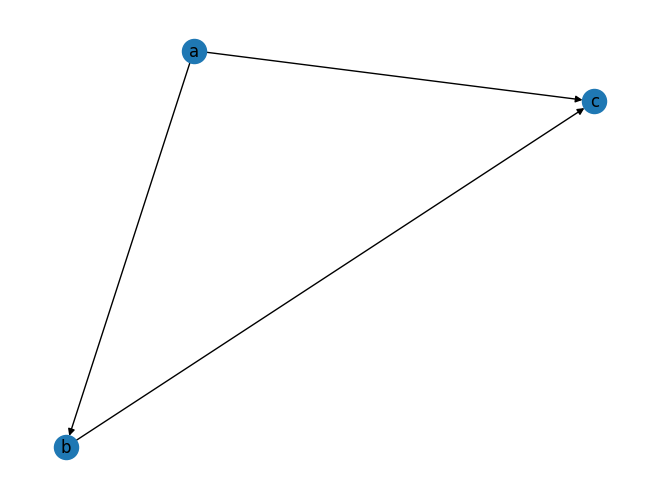

In [33]:
import networkx as nx
G=nx.DiGraph([
    ("a", "b", {"length":3}),
    ("b", "c", {"length":4}),
    ("a", "c", {"length":5}),
])
nx.draw(G, with_labels = True)

具体的算法使用可以查 [文档](https://networkx.org/documentation/stable/reference/algorithms/index.html)。下面是最短路算法的示例：

In [48]:
# 最短路，返回 dict | list
print(nx.shortest_path(G, source="a"))
print(nx.shortest_path(G, source="a", target="c"))

{'a': ['a'], 'b': ['a', 'b'], 'c': ['a', 'c']}
['a', 'c']
